In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
url = r'C:\Users\ACER\MIAS\all-mias'

info = pd.read_csv(r'C:\Users\ACER\MIAS\Info.txt', sep=" ")

In [4]:
info.shape

(330, 8)

In [5]:
img_name = []

for i in range(info.shape[0]):
        img_name.append(info.REFNUM[i]+ '.pgm')
        
img_add = []
for i in range(info.shape[0]):
    img_add.append(url + '\\' +info.REFNUM[i]+ '.pgm')

label = []
for i in range(len(info)):
    if info.SEVERITY[i] == 'B':
        label.append(1)
    else:
        label.append(0)

In [6]:
print(img_add[2])
print(img_name[2])
print(len(img_name))
print(len(img_add))
print(len(label))

C:\Users\ACER\MIAS\all-mias\mdb003.pgm
mdb003.pgm
330
330
330


In [7]:
def save_dictionary(path,data):
    print('saving catalog...')
    #open('u.item', encoding="utf-8")
    import json
    with open(path,'w') as outfile:
      json.dump(str(data), fp=outfile)
      # save to file:
    print('catalog saved')

In [8]:
def preprocess_image():
    print("Reading images")
    info = {}
    for i in range(info.shape[0]):
        img = cv2.imread(image_add[i], 0)

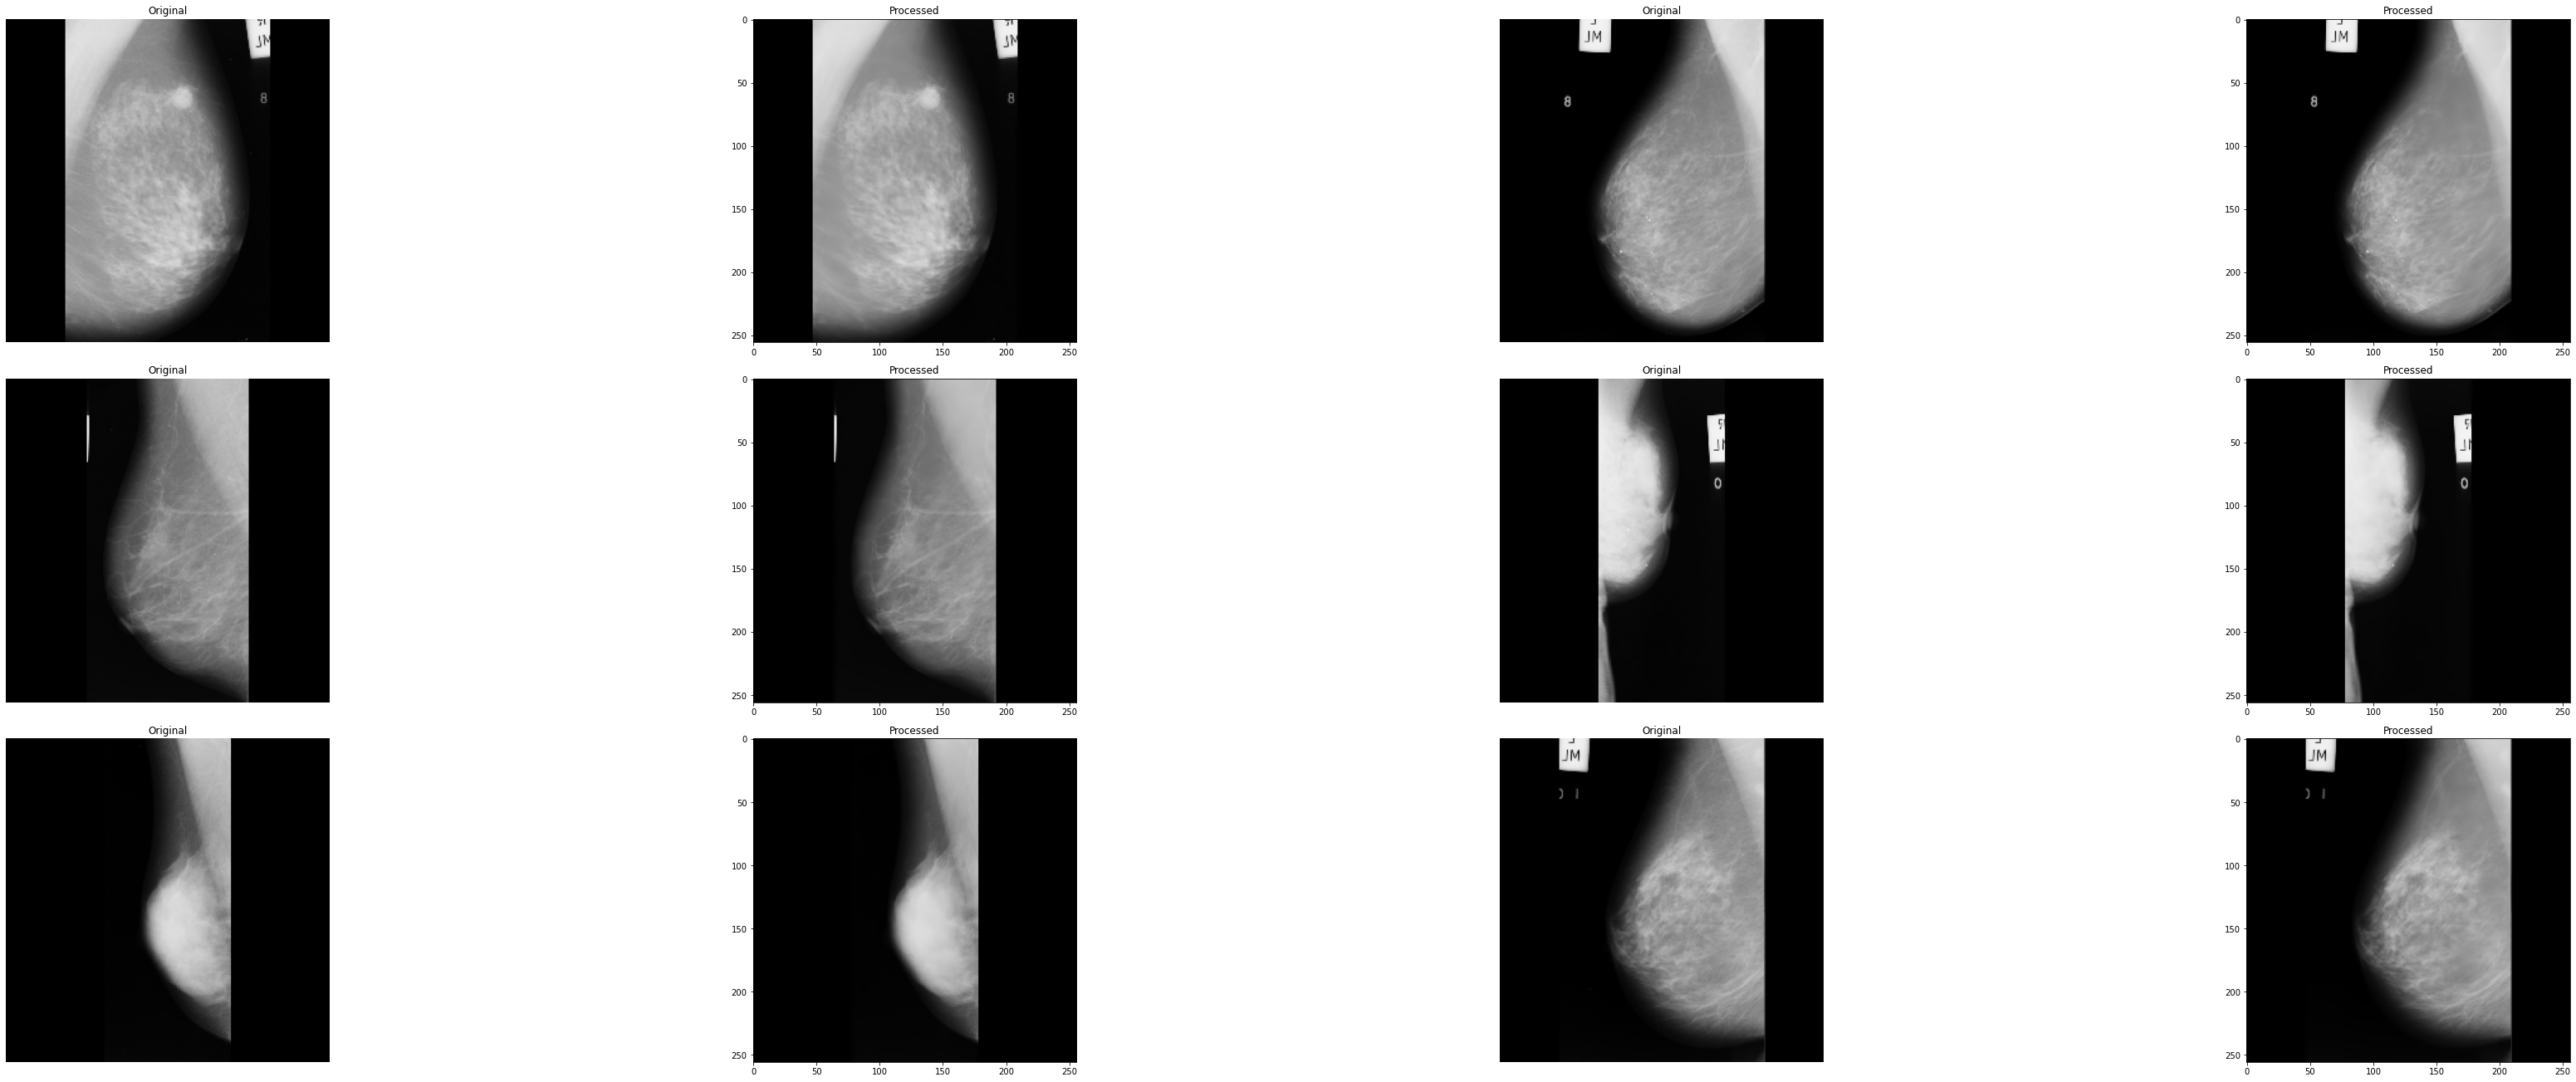

In [47]:
import random
# view images
def view_25_random_image():
    fig = plt.figure(figsize = (50, 30))
    for i in range(0, 12, 2):
        rand = random.randint(0,len(img_add))
    
        img = cv2.imread(img_add[rand], 1)
        img = cv2.resize(img, (256,256))
#         if label[rand] == 1:
#             plt.title('B')
#         else:
#             plt.title('M')
        ax = plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.axis('off')
        plt.title('Original')
        plt.imshow(img)
        img = cv2.fastNlMeansDenoising(img, None, 3, 21, 7)
        ax = plt.subplot(5, 4, i+2)
        plt.title('Processed')
        plt.imshow(img)
#     fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

In [10]:
start = 0
end = 360
step = 1

In [11]:
def read_image():
    print("Reading images")
    import cv2
    info = {}
    for i in range(322):
        if i<9:
            image_name='mdb00'+str(i+1)
        elif i<99:
            image_name='mdb0'+str(i+1)
        else:
            image_name = 'mdb' + str(i+1)
#         print(image_name)
        image_address = url + '\\' + image_name + '.pgm'
#         print(image_address)
        img = cv2.imread(image_address, 0)
#         print(i)
        try:
            img = cv2.resize(img, (64, 64))   #resize image
            rows, cols = img.shape
            info[image_name]={}
            for angle in range(start, end, step):
                M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
                img_rotated = cv2.warpAffine(img, M, (cols, rows))
                info[image_name][angle]=img_rotated
        except:
            print("except")
    return (info)

In [12]:
def labelling():
    print("labelling")
    filename = url+'\\Info.txt'
    text_all = open(filename).read()
    #print(text_all)
    lines=text_all.split('\n')
    info={}
    for line in lines:
        words=line.split(' ')
        if (words[2] == "NORM"):
            info[words[0]] = {}
            for angle in range(start, end, step):
                info[words[0]][angle] = 0
        else:
            info[words[0]] = {}
            if (words[3] == 'B'):
                for angle in range(start, end, step):
                    info[words[0]][angle] = 1
            elif (words[3] == 'M'):
                for angle in range(start, end, step):
                    info[words[0]][angle] = 2
    return (info)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
label_info = labelling()
image_info = read_image()
ids = label_info.keys()

labelling
Reading images


In [15]:
ids = label_info.keys()
len(ids)

322

In [16]:
X=[]
Y=[]
for id in ids:
    for angle in range(start, end, step):
        X.append(image_info[id][angle])
        Y.append(label_info[id][angle])
X=np.array(X)
Y=np.array(Y)

In [17]:
print(len(X))
print(len(Y))

115920
115920


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
(a,b,c)=x_train.shape
x_train = np.reshape(x_train, (a, b, c, 1))  #1 for gray scale
(a, b, c)=x_test.shape
x_test = np.reshape(x_test, (a, b, c, 1))   #1 for gray scale
print(x_train.shape)
print(x_test.shape)

(92736, 64, 64)
(23184, 64, 64)
(92736,)
(23184,)
(92736, 64, 64, 1)
(23184, 64, 64, 1)


In [19]:
from keras.utils import to_categorical
Y_test = to_categorical(y_test)
Y_train = to_categorical(y_train)

In [20]:
#libraries for deep learning (CNN)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics

In [21]:
rows, cols, color = x_train[0].shape
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1, 1),input_shape=(rows,cols,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='valid', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience=5,restore_best_weights=True, verbose=1)

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'], callbacks=[es])
history = model.fit(x_train, Y_train, validation_split=0.2, epochs = 100, batch_size=128)

Epoch 1/100
580/580 [==============================] - 1393s 2s/step - loss: 1.2201 - accuracy: 0.6339 - val_loss: 0.8889 - val_accuracy: 0.6398
Epoch 2/100
580/580 [==============================] - 1394s 2s/step - loss: 0.8621 - accuracy: 0.6466 - val_loss: 0.8555 - val_accuracy: 0.6444
Epoch 3/100
580/580 [==============================] - 1393s 2s/step - loss: 0.8336 - accuracy: 0.6537 - val_loss: 0.8305 - val_accuracy: 0.6493
Epoch 4/100
580/580 [==============================] - 1392s 2s/step - loss: 0.8065 - accuracy: 0.6612 - val_loss: 0.7976 - val_accuracy: 0.6618
Epoch 5/100
580/580 [==============================] - 1384s 2s/step - loss: 0.7804 - accuracy: 0.6685 - val_loss: 0.7649 - val_accuracy: 0.6705
Epoch 6/100
580/580 [==============================] - 1386s 2s/step - loss: 0.7481 - accuracy: 0.6796 - val_loss: 0.7373 - val_accuracy: 0.6842
Epoch 7/100
580/580 [==============================] - 1391s 2s/step - loss: 0.7198 - accuracy: 0.6895 - val_loss: 0.7185 - val_ac

580/580 [==============================] - 1376s 2s/step - loss: 0.2171 - accuracy: 0.9185 - val_loss: 0.2085 - val_accuracy: 0.9274
Epoch 58/100
580/580 [==============================] - 1378s 2s/step - loss: 0.2120 - accuracy: 0.9226 - val_loss: 0.2000 - val_accuracy: 0.9258
Epoch 59/100
580/580 [==============================] - 1376s 2s/step - loss: 0.2145 - accuracy: 0.9218 - val_loss: 0.2046 - val_accuracy: 0.9289
Epoch 60/100
580/580 [==============================] - 1380s 2s/step - loss: 0.2097 - accuracy: 0.9231 - val_loss: 0.2097 - val_accuracy: 0.9278
Epoch 61/100
580/580 [==============================] - 1374s 2s/step - loss: 0.2044 - accuracy: 0.9245 - val_loss: 0.1972 - val_accuracy: 0.9260
Epoch 62/100
580/580 [==============================] - 1377s 2s/step - loss: 0.2080 - accuracy: 0.9232 - val_loss: 0.1961 - val_accuracy: 0.9312
Epoch 63/100
580/580 [==============================] - 1374s 2s/step - loss: 0.2039 - accuracy: 0.9256 - val_loss: 0.1860 - val_accuracy

ValueError: in user code:

    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1176 test_step
        self.compiled_loss(
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\ACER\.conda\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [26]:
loss_value , accuracy = model.evaluate(x_test, Y_test)

print('Test_loss_value = ' + str(loss_value))
print('test_accuracy = ' + str(accuracy))

save_dictionary('history1.dat', history.history)

725/725 [==============================] - 133s 184ms/step - loss: 0.1542 - accuracy: 0.9522
Test_loss_value = 0.15421772003173828
test_accuracy = 0.952208399772644
saving catalog...
catalog saved


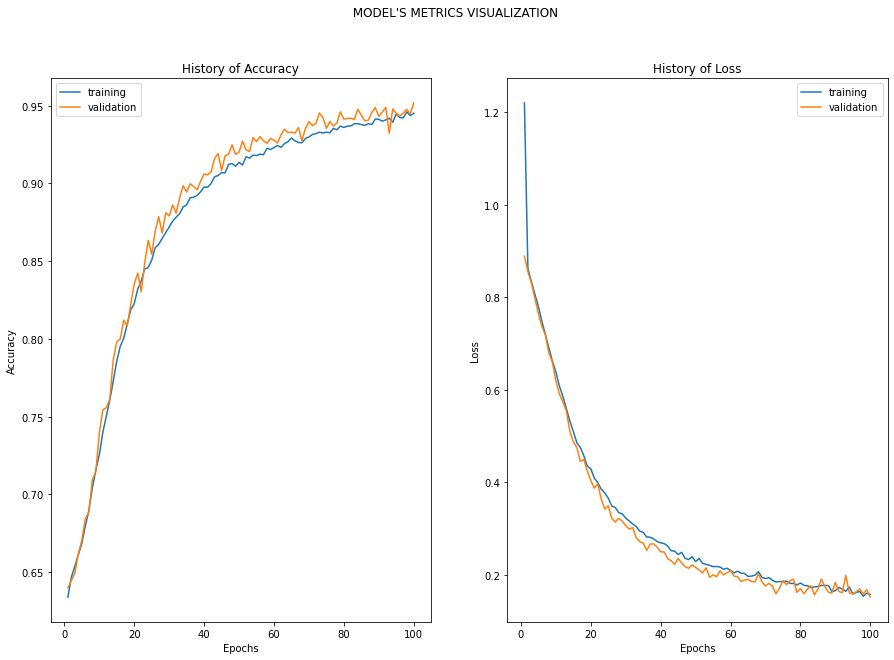

In [27]:
import matplotlib.pyplot as plt
def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'])

In [28]:
y_pred=model.predict(x_test)
y_pred_prb=y_pred
print(Y_test)
print(y_pred)

Instructions for updating:
Please use `model.predict()` instead.
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[6.7613111e-04 3.5785192e-03 9.9574536e-01]
 [1.0000000e+00 5.6752963e-10 1.3875037e-09]
 [6.9491260e-05 9.9993014e-01 3.3149433e-07]
 ...
 [1.0000000e+00 9.8251396e-19 3.9569500e-14]
 [4.1579798e-01 5.8348262e-01 7.1934448e-04]
 [1.0555334e-08 9.9999988e-01 1.4067527e-07]]


In [42]:
pred = []
for x in y_pred:
    if x[0] > x[1] and x[0] > x[2]:
        pred.append(0)
    elif x[1] > x[0] and x[1] > x[2]:
        pred.append(1)
    elif x[2] > x[0] and x[2] > x[1]:
        pred.append(2)
pred = np.array(pred)
print(pred)
print(y_test)

[2 0 1 ... 0 1 1]
[2 0 1 ... 0 0 1]


In [43]:
pred_prb = []
for x in y_pred_prb:
    if x[0] > x[1] and x[0] > x[2]:
        pred_prb.append(x[0])
    elif x[1] > x[0] and x[1] > x[2]:
        pred_prb.append(x[1])
    elif x[2] > x[0] and x[2] > x[1]:
        pred_prb.append(x[2])
pred_prb = np.array(pred_prb)
print(pred_prb)

[0.99574536 1.         0.99993014 ... 1.         0.5834826  0.9999999 ]


In [48]:
from sklearn import metrics
target=["Normal","Abnomral- Benign","Abnormal- Malignant"]
print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred),4))
print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),4))
print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),4))
print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),4))
print('ROC AUC Score:', np.round(metrics.roc_auc_score(y_test, y_pred_prb,multi_class='ovr', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, pred),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, pred,target_names=target))

Accuracy: 0.9522
Precision: 0.9521
Recall: 0.9522
F1 Score: 0.9521
ROC AUC Score: 0.9901
Cohen Kappa Score: 0.9076
		Classification Report:
                      precision    recall  f1-score   support

             Normal       0.96      0.97      0.97     14933
   Abnomral- Benign       0.92      0.92      0.92      4545
Abnormal- Malignant       0.96      0.91      0.93      3706

           accuracy                           0.95     23184
          macro avg       0.95      0.93      0.94     23184
       weighted avg       0.95      0.95      0.95     23184

